<a href="https://colab.research.google.com/github/UTExDrake/AI_Basic/blob/main/AI_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=f89b33a4cc0e8f2fdae029efedeee52bc015b01b61e3ef55830b4064354c677a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-4-85c6e3bda5e1>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-85c6e3bda5e1>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-85c6e3bda5e1>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


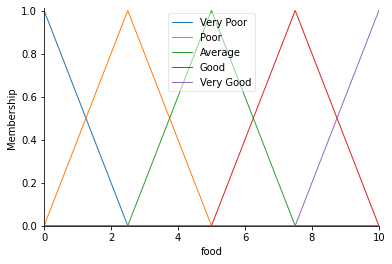

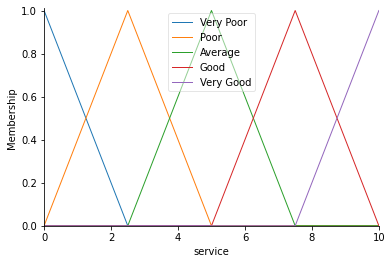

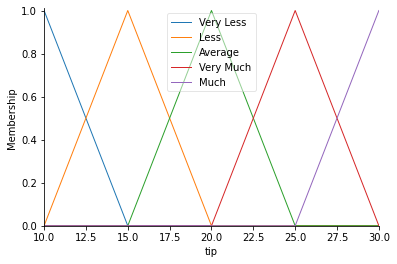

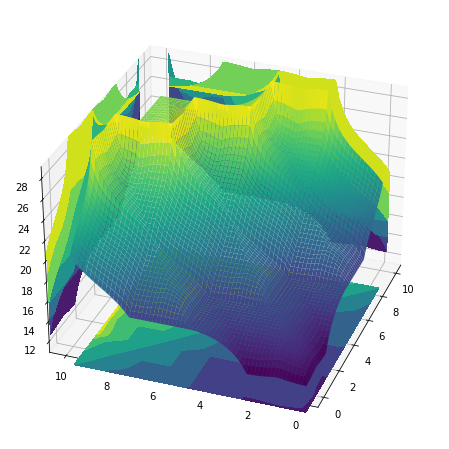

In [ ]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt

universe = np.linspace(0, 10, 61)     
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')
names = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']     ### so phan tu la so le
names_tip = ['Very Less', 'Less', 'Average', 'Very Much', 'Much'] ### ===
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names_tip)
food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Poor'])| 
                                (food['Poor'] & service['Very Poor'])| 
                                (food['Very Poor'] & service['Poor'])), 
                                consequent = tip['Very Less'], label = 'Rule Very Poor')
###----------------------------------------------------------------------------------------###
rule1 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Average'])|
                                (food['Very Poor'] & service['Good'])|
                                (food['Good'] & service['Very Poor'])| 
                                (food['Poor'] & service['Poor'])| 
                                (food['Poor'] & service['Average'])|
                                (food['Average'] & service['Very Poor'])|
                                (food['Average'] & service['Poor'])), 
                                consequent = tip['Less'], label = 'Rule Poor')
###----------------------------------------------------------------------------------------###
rule2 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Good'])| 
                                (food['Poor'] & service['Good'])| 
                                (food['Average'] & service['Average'])|
                                (food['Good'] & service['Poor'])|
                                (food['Very Good'] & service['Very Poor'])), 
                                consequent = tip['Average'], label = 'Rule Average')
###----------------------------------------------------------------------------------------###
rule3 = ctrl.Rule(antecedent = ((food['Poor'] & service['Very Good'])| 
                                (food['Average'] & service['Good'])| 
                                (food['Average'] & service['Very Good'])|
                                (food['Good'] & service['Average'])|
                                (food['Good'] & service['Good'])|
                                (food['Very Good'] & service['Poor'])|
                                (food['Very Good'] & service['Average'])), 
                                consequent = tip['Much'], label = 'Rule Much')
###----------------------------------------------------------------------------------------###
rule4 = ctrl.Rule(antecedent = ((food['Good'] & service['Very Good'])| 
                                (food['Very Good'] & service['Good'])| 
                                (food['Very Good'] & service['Very Good'])), 
                                consequent = tip['Very Much'], label = 'Rule Very Good')
     

system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)




                                
                  


<ipython-input-27-473bd6cb3765>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-27-473bd6cb3765>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-27-473bd6cb3765>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


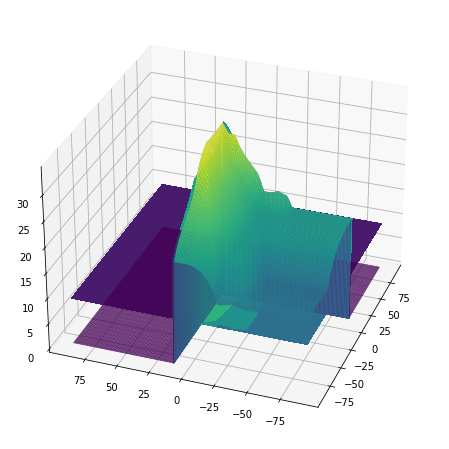

In [ ]:
#--------------Pendulum--------------#
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

alpha = np.linspace(-90, 90, 180)
alpha1 = np.linspace(-45, 45, 90)
force = np.linspace(10, 50, 100)
alpha = ctrl.Antecedent(alpha, 'alpha')
alpha1 = ctrl.Antecedent(alpha1, 'alpha1')
force = ctrl.Consequent(force, 'force')
names = ['LN', 'N', 'Zero', 'P', 'LP']
names_force = ['Very Less', 'Less', 'Average', 'Much', 'Very Much']
alpha.automf(names = names)
alpha1.automf(names = names)
force.automf(names = names_force)

rule1 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['LN'])| 
                                (alpha['N'] & alpha1['LN'])| 
                                (alpha['LN'] & alpha1['N'])), 
                                consequent = force['Very Less'], label = 'Rule LN')
###-----------------------------------------------------------------------------------###
rule2 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['Zero'])|
                                (alpha['LN'] & alpha1['P'])|
                                (alpha['P'] & alpha1['LN'])| 
                                (alpha['N'] & alpha1['N'])| 
                                (alpha['Zero'] & alpha1['LN'])|
                                
                                (alpha['Zero'] & alpha1['N'])), 
                                consequent = force['Less'], label = 'Rule N')
###-----------------------------------------------------------------------------------###
rule3 = ctrl.Rule(antecedent = ((alpha['LN'] & alpha1['LP'])| 
                                (alpha['N'] & alpha1['P'])| 
                                (alpha['Zero'] & alpha1['Zero'])|
                                (alpha['P'] & alpha1['N'])|
                                
                                (alpha['N'] & alpha1['Zero'])|
                                
                                (alpha['LP'] & alpha1['LN'])), 
                                consequent = force['Average'], label = 'Rule Zero')
###-----------------------------------------------------------------------------------###
rule4 = ctrl.Rule(antecedent = ((alpha['N'] & alpha1['LP'])| 
                                (alpha['Zero'] & alpha1['P'])| 
                                (alpha['Zero'] & alpha1['LP'])|
                                (alpha['P'] & alpha1['Zero'])|
                                (alpha['P'] & alpha1['P'])|
                                (alpha['LP'] & alpha1['N'])|
                                (alpha['LP'] & alpha1['Zero'])), 
                                consequent = force['Much'], label = 'Rule P')
###-----------------------------------------------------------------------------------###
rule5 = ctrl.Rule(antecedent = ((alpha['P'] & alpha1['LP'])| 
                                (alpha['LP'] & alpha1['P'])| 
                                (alpha['LP'] & alpha1['LP'])), 
                                consequent = force['Very Much'], label = 'Rule LP')

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 100 * 100 + 1)
upsampled = np.linspace(-90, 90, 180)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['alpha'] = x[i, j]
    sim.input['alpha1'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['force']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.5, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)


<ipython-input-28-d128ec41c23b>:82: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-28-d128ec41c23b>:83: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-28-d128ec41c23b>:84: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


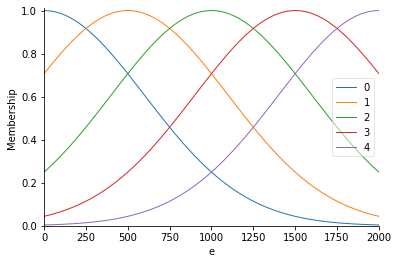

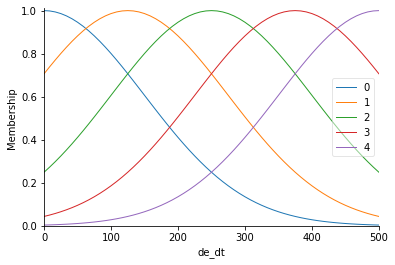

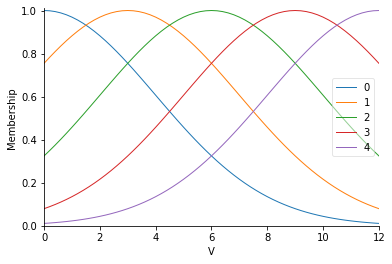

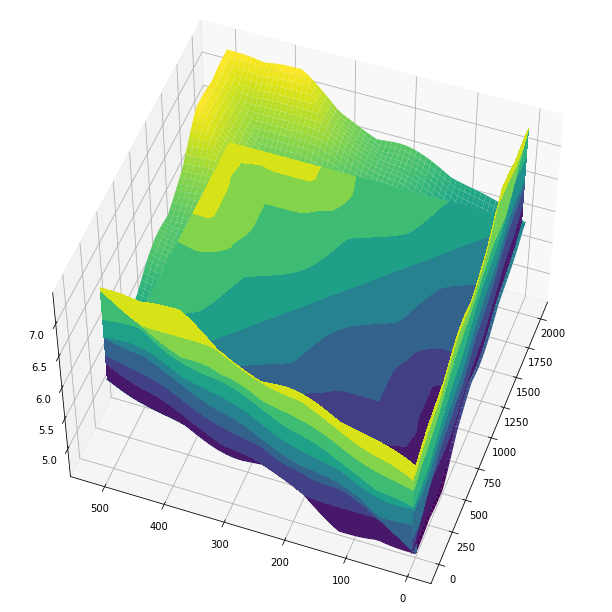

In [ ]:
#========================
# DC Servo Motor
#Bo dieu khien gom 
#2 input: sai số e và đạo ham cua e
#1 output là dien ap V cap cho DC motor
#Chọn khoảng cho e là [0, 1000] (RPM), de/dt là [0, 500], V là [0, 12] (V)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#========================
e['0'] = fuzz.gaussmf(e.universe,0,600)
e['1'] = fuzz.gaussmf(e.universe,500,600)
e['2'] = fuzz.gaussmf(e.universe,1000,600)
e['3'] = fuzz.gaussmf(e.universe,1500,600)
e['4'] = fuzz.gaussmf(e.universe,2000,600)
e.view()
#========================
de_dt['0'] = fuzz.gaussmf(de_dt.universe,0,150)
de_dt['1'] = fuzz.gaussmf(de_dt.universe,125,150)
de_dt['2'] = fuzz.gaussmf(de_dt.universe,250,150)
de_dt['3'] = fuzz.gaussmf(de_dt.universe,375,150)
de_dt['4'] = fuzz.gaussmf(de_dt.universe,500,150)
de_dt.view()
#========================
V['0'] = fuzz.gaussmf(V.universe,0,4)
V['1'] = fuzz.gaussmf(V.universe,3,4)
V['2'] = fuzz.gaussmf(V.universe,6,4)
V['3'] = fuzz.gaussmf(V.universe,9,4)
V['4'] = fuzz.gaussmf(V.universe,12,4)
V.view()
#Rule of Fuzzy logic
rule0 = ctrl.Rule(antecedent=((e['0']&de_dt['0'])|(e['0']&de_dt['1'])|
                              (e['1']&de_dt['0'])|(e['0']&de_dt['2'])|
                              (e['2']&de_dt['0'])), 
                              consequent= V['0']) ### Rule V(0)

rule1 = ctrl.Rule(antecedent=((e['3']&de_dt['0'])|(e['0']&de_dt['3'])|
                              (e['2']&de_dt['1'])|(e['1']&de_dt['2'])|
                              (e['1']&de_dt['1'])), 
                              consequent= V['1']) ### Rule V(1)

rule2 = ctrl.Rule(antecedent=((e['0']&de_dt['4'])|(e['4']&de_dt['0'])|(e['1']&de_dt['3'])|
                              (e['3']&de_dt['1'])|(e['2']&de_dt['2'])), 
                              consequent= V['2']) ### Rule V(2)

rule3 = ctrl.Rule(antecedent=((e['4']&de_dt['1'])|(e['1']&de_dt['4'])|
                              (e['3']&de_dt['2'])|(e['2']&de_dt['3'])|
                              (e['3']&de_dt['3'])),
                             consequent= V['3']) ### Rule V(3)

rule4 = ctrl.Rule(antecedent=((e['4']&de_dt['4'])|(e['4']&de_dt['3'])|
                              (e['3']&de_dt['4'])|(e['4']&de_dt['2'])|
                              (e['2']&de_dt['4'])), 
                              consequent= V['4']) ### Rule V(4)                            
#========================
System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4, rule0])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61 + 1)
upSampled1 = np.linspace(0,2000,61)
upSampled2 = np.linspace(0,500,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['e']= x[i,j]
    sim.input['de_dt']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['V']

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,200)

### Nhiệt độ ###

In [13]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
universe = np.linspace(0,100,61) 
universe1 = np.linspace(0,100,61)
universe2 = np.linspace(0,100,200)
temp = ctrl.Antecedent(universe, 'temp')
humid = ctrl.Antecedent(universe1, 'humid')
fan = ctrl.Consequent(universe2, 'fan')

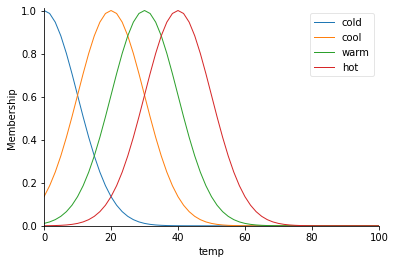

In [8]:
temp['cold'] = fuzzy.gaussmf(temp.universe,0,10)
temp['cool'] = fuzzy.gaussmf(temp.universe,20,10)
temp['warm'] = fuzzy.gaussmf(temp.universe,30,10)
temp['hot'] = fuzzy.gaussmf(temp.universe,40,10)
temp.view()

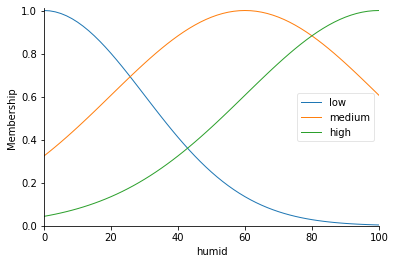

In [10]:
humid['low'] = fuzzy.gaussmf(humid.universe,0,30)
humid['medium'] = fuzzy.gaussmf(humid.universe,60,40)
humid['high'] = fuzzy.gaussmf(humid.universe,100,40)
humid.view()

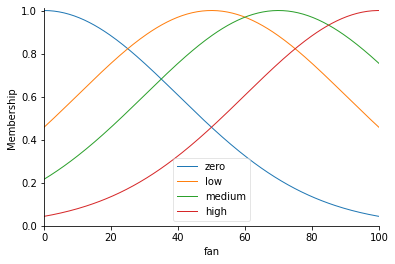

In [11]:
fan['zero'] = fuzzy.gaussmf(fan.universe,0,40)
fan['low'] = fuzzy.gaussmf(fan.universe,50,40)
fan['medium'] = fuzzy.gaussmf(fan.universe,70,40)
fan['high'] = fuzzy.gaussmf(fan.universe,100,40)
fan.view()

In [12]:

rule0 = ctrl.Rule(antecedent=((temp['cool']&humid['high'])|
                              (temp['cold']&humid['medium'])|
                              (temp['cold']&humid['low'])), 
                              consequent= fan['medium'])

rule1 = ctrl.Rule(antecedent=((temp['warm']&humid['high'])|
                              (temp['cool']&humid['medium'])|
                              (temp['cool']&humid['low'])), 
                              consequent= fan['low'])

rule2 = ctrl.Rule(antecedent=((temp['hot']&humid['high'])|
                              (temp['warm']&humid['medium'])|
                              (temp['hot']&humid['medium'])|
                              (temp['hot']&humid['low'])|
                              (temp['warm']&humid['low'])), 
                              consequent= fan['zero'])

rule3 = ctrl.Rule(antecedent=((temp['cold']&humid['high'])), 
                              consequent= fan['high'])

In [16]:
System  = ctrl.ControlSystem([rule1, rule2, rule0, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,30,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

<ipython-input-22-80c478bcaf93>:12: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-22-80c478bcaf93>:13: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-22-80c478bcaf93>:14: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


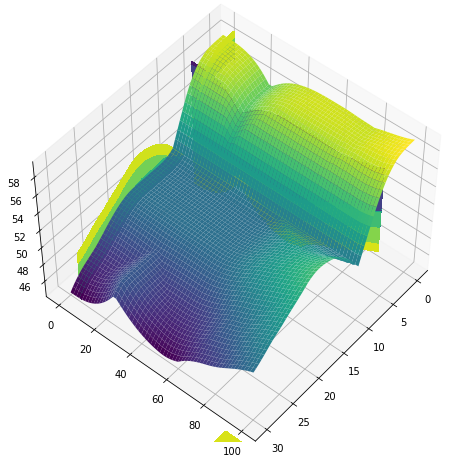

In [22]:
for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan']
#-----------------------------#
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,40)

Level_Control


In [38]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
universe = np.linspace(-1,1,200) 
universe1 = np.linspace(0,1,200)
level = ctrl.Antecedent(universe, 'level')
valve = ctrl.Consequent(universe1, 'valve')

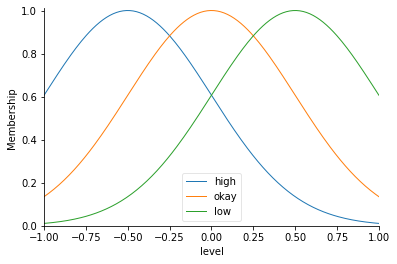

In [29]:

level['high'] = fuzzy.gaussmf(level.universe,-0.5,0.5)
level['okay'] = fuzzy.gaussmf(level.universe,0,0.5)
level['low'] = fuzzy.gaussmf(level.universe,0.5,0.5)
level.view()
     

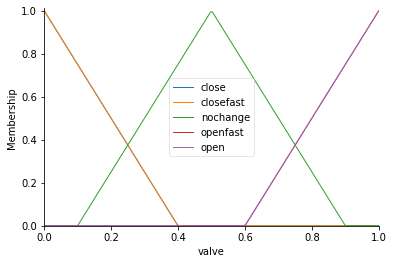

In [36]:

valve['close'] = fuzzy.trimf(valve.universe,[0,0,0.4])
valve['nochange'] = fuzzy.trimf(valve.universe,[0.1,0.5,0.9])
valve['open'] = fuzzy.trimf(valve.universe,[0.6,1,1])
valve.view()
     

In [37]:
rule1 = ctrl.Rule(level['okay'], valve['nochange'])
rule2 = ctrl.Rule(level['low'], valve['open'])
rule3 = ctrl.Rule(level['high'], valve['close'])

In [41]:
System  = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,1,61)
upSampled2 = np.linspace(1,1,61)
x = np.linspace(0,1,61)
z = np.zeros_like(x)

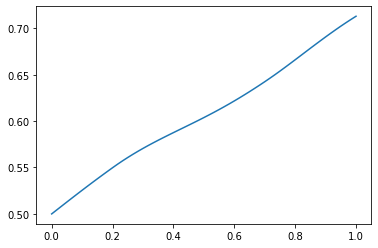

In [42]:
for i in range(61):
  sim.input['level']= x[i]
  sim.compute()
  z[i]=sim.output['valve']

plt.plot(x,z) 